In [4]:
# import spacec first
import spacec as sp

# import standard packages
import os
import warnings
import numpy as np
import scanpy as sc
import matplotlib

warnings.filterwarnings('ignore')

sc.settings.set_figure_params(dpi=80, facecolor='white') 
# set the default color map to viridis, the below paramters can be chanaged
matplotlib.rcParams["image.cmap"] = 'viridis'

In [5]:
# Specify the path to the data
root_path = "/dss/dsshome1/00/ge65tib2/Spacec/" # replace with your path
data_path = root_path + 'example_data/raw/' # where the data is stored

# where you want to store the output
output_dir = root_path + 'example_data/output/'
os.makedirs(output_dir, exist_ok=True)

In [6]:
seg_output1 = sp.tl.cell_segmentation(
    file_name = output_dir + 'reg002_X01_Y01_Z01.tif',
    channel_file = '/dss/dsshome1/00/ge65tib2/channelnames.txt',
    output_dir = output_dir,
    seg_method ='cellpose',
    model='nuclei',
    nuclei_channel = 'DAPI',
    output_fname = 'region_2', #default is None; if provide more than one channel, then they will be combined
    compartment = 'nuclei', # mesmer # segment whole cells or nuclei only
    input_format ='Multichannel', # Phenocycler or codex
    resize_factor=1, # default is 1; if the image is too large, lower the value. Lower values will speed up the segmentation but may reduce the accuracy.
    size_cutoff = 0)

Create image channels!
Segmenting with Cellpose!


INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU
INFO:cellpose.models:>> nuclei << model set to be used
INFO:cellpose.models:>>>> loading model /dss/dsshome1/00/ge65tib2/.cellpose/models/nucleitorch_0
INFO:cellpose.models:>>>> model diam_mean =  17.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [0, 0]
INFO:cellpose.models:~~~ ESTIMATING CELL DIAMETER(S) ~~~
INFO:cellpose.models:estimated cell diameter(s) in 104.93 sec
INFO:cellpose.models:>>> diameter(s) = 
INFO:cellpose.models:[ 12.77 ]
INFO:cellpose.models:~~~ FINDING MASKS ~~~
INFO:cellpose.models:>>>> TOTAL TIME 183.74 sec


Quantifying features after segmentation!


Processing channels: 100%|██████████| 10/10 [00:12<00:00,  1.22s/it]


Done!


Create image channels!
Segmenting with Mesmer!
downloading Mesmer model
Mesmer model downloaded and unpacked


2025-06-27 18:16:33.545738: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


No membrane image provided. Nuclear segmentation only.


INFO:root:Converting image dtype to float


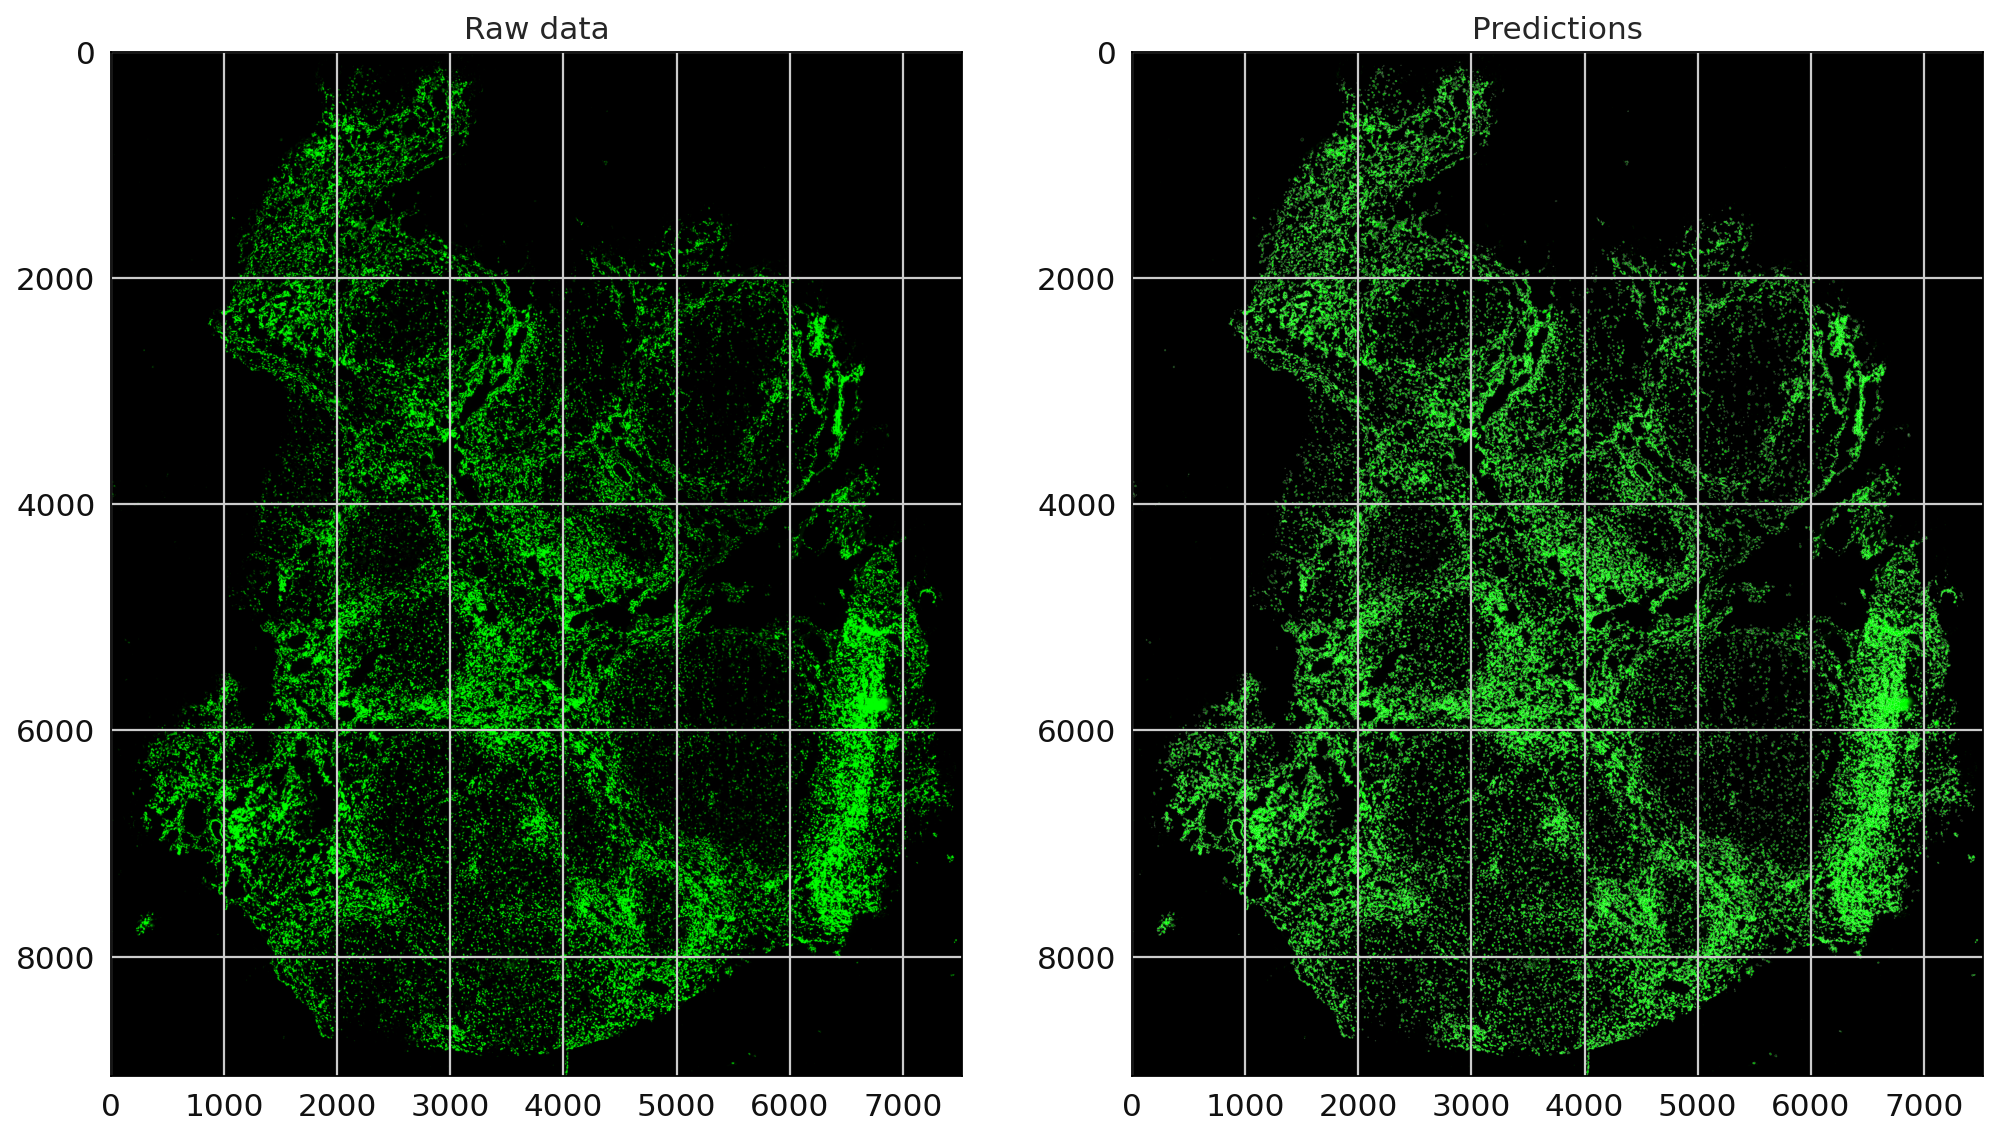

Quantifying features after segmentation!


Processing channels: 100%|██████████| 10/10 [00:13<00:00,  1.34s/it]


Done!


In [7]:
seg_output2 = sp.tl.cell_segmentation(
    file_name = output_dir + 'reg002_X01_Y01_Z01.tif',
    channel_file = '/dss/dsshome1/00/ge65tib2/channelnames.txt',
    output_dir = output_dir,
    seg_method ='mesmer', # cellpose or mesmer
    nuclei_channel = 'DAPI',
    output_fname = 'region_2', #default is None; if provide more than one channel, then they will be combined
    compartment = 'nuclei', # mesmer # segment whole cells or nuclei only
    input_format ='Multichannel', # Phenocycler or codex
    resize_factor=1, # default is 1; if the image is too large, lower the value. Lower values will speed up the segmentation but may reduce the accuracy.
    size_cutoff = 0)

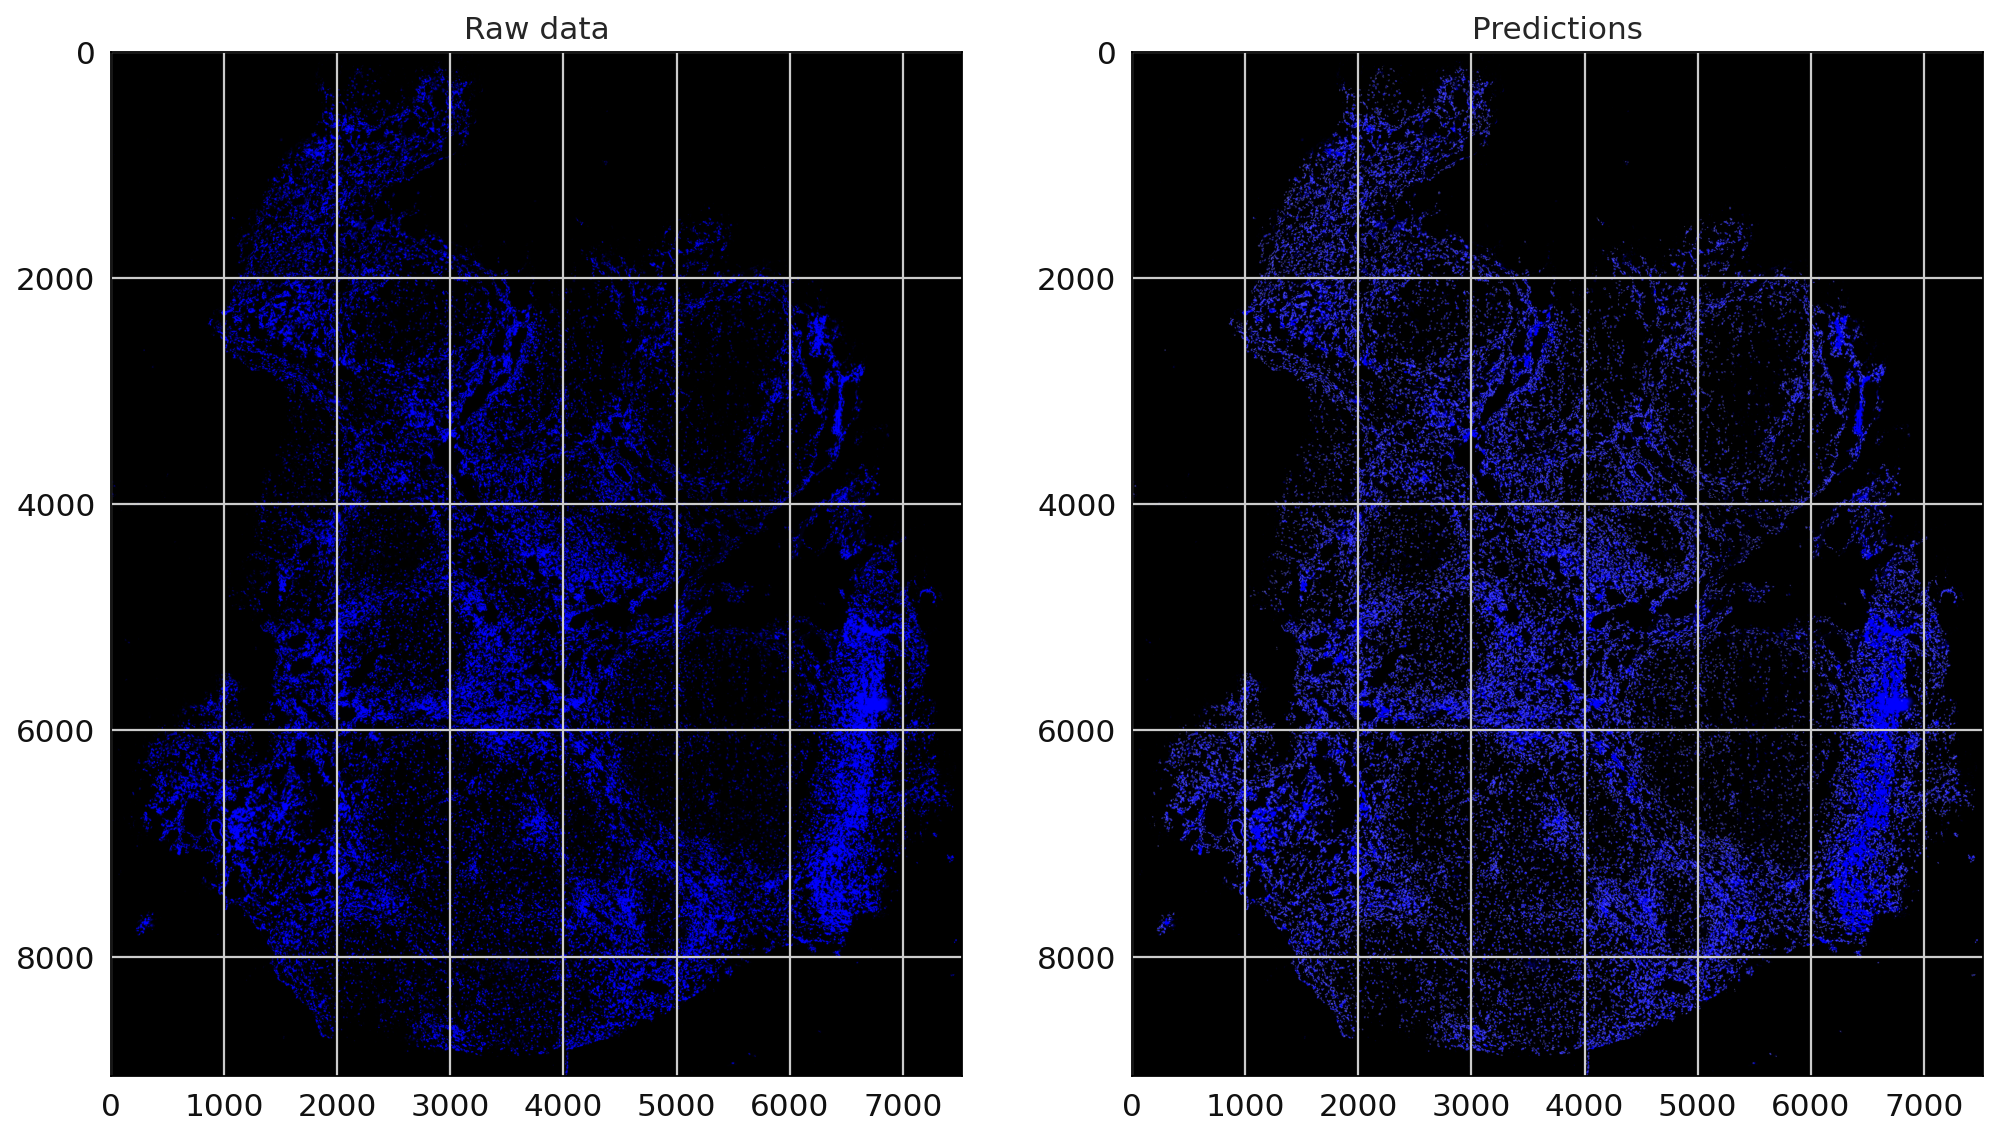

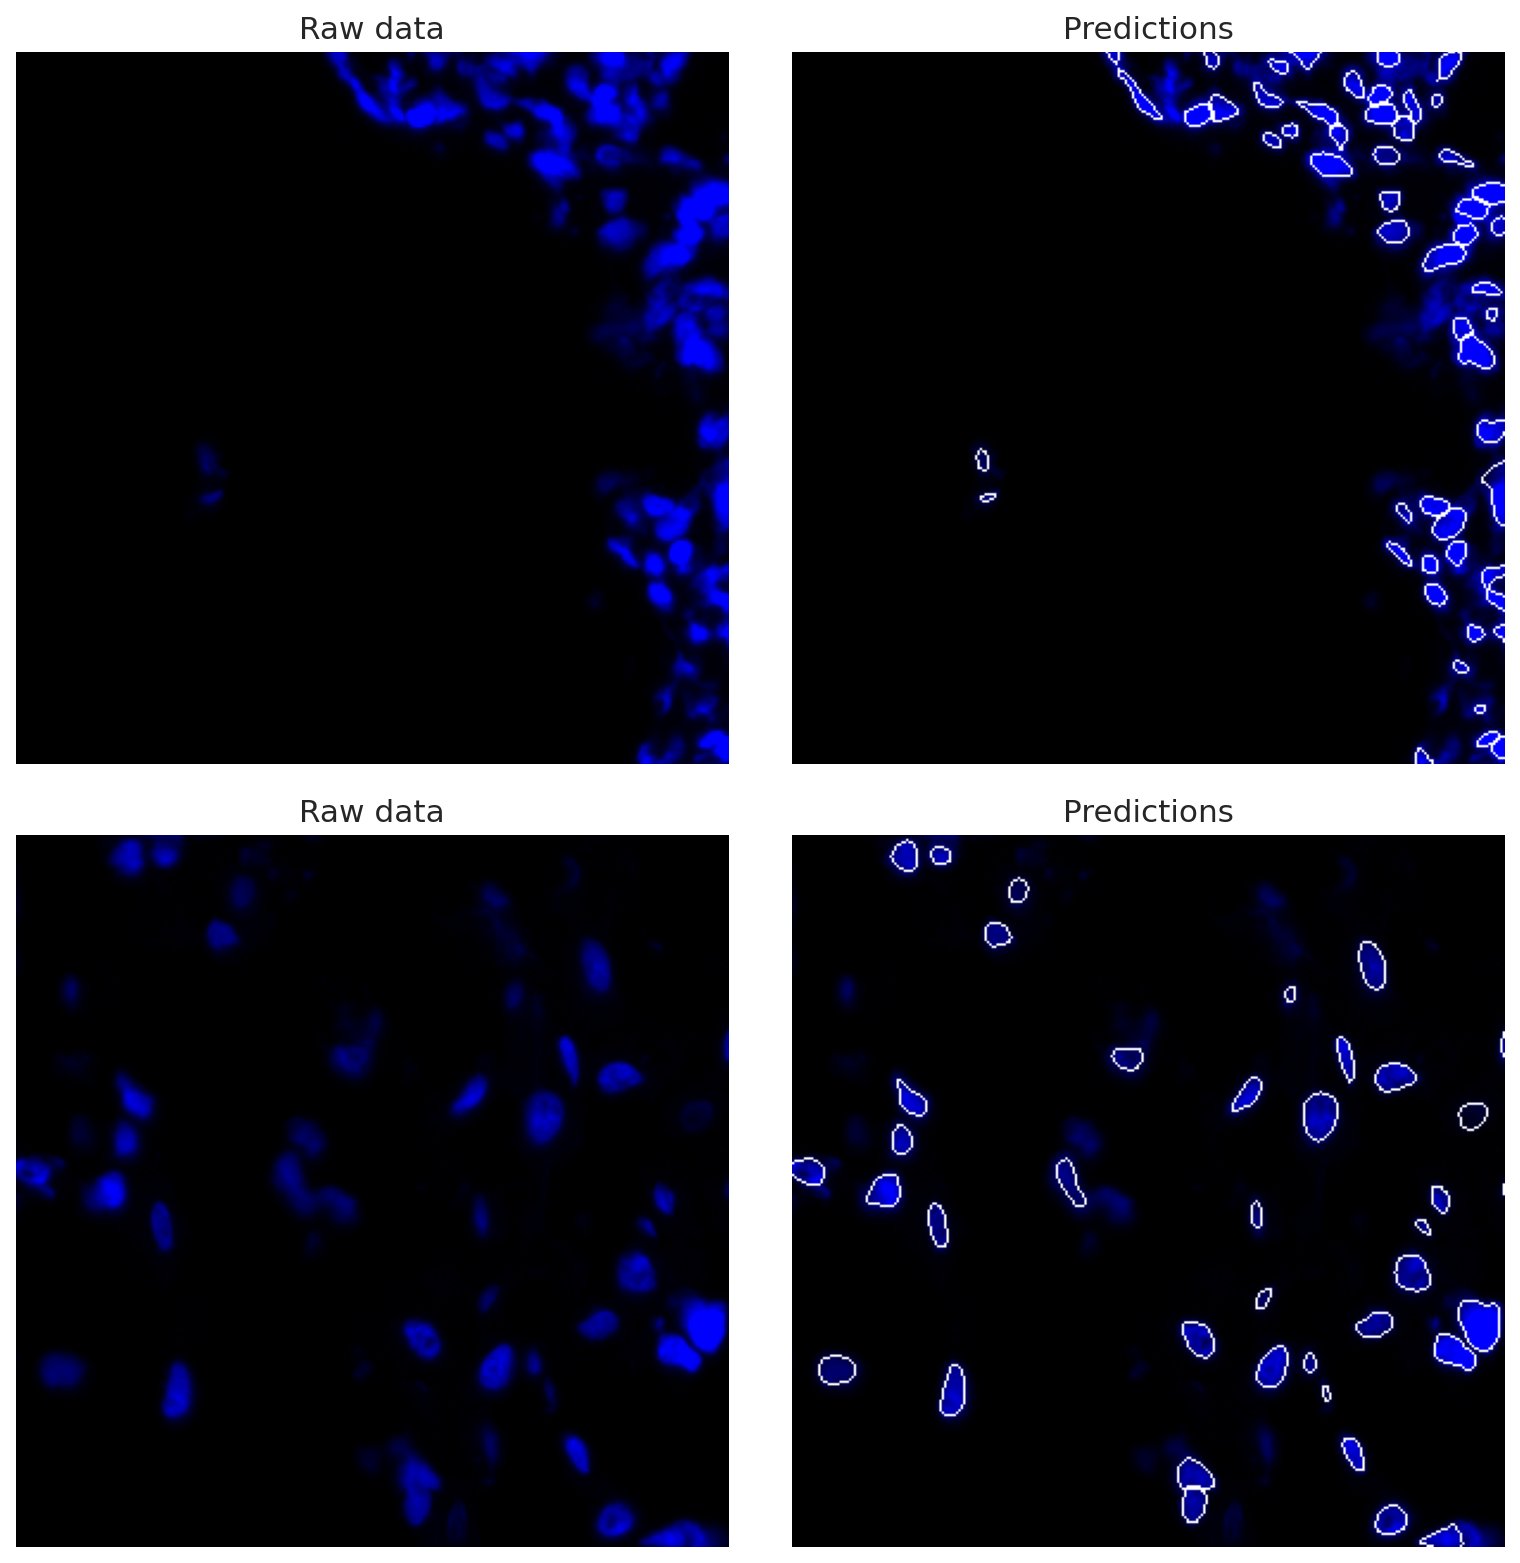

In [8]:
overlay_data1, rgb_images1 = sp.pl.show_masks(
    seg_output=seg_output1,
    nucleus_channel = 'DAPI', # channel used for nuclei segmentation, # additional channels to display (displayed in green - channels will be combined into one image)
    show_subsample = True, # show a random subsample of the image
    n=2, #need to be at least 2
    tilesize = 300,# number of subsamples and tilesize
    rand_seed = 1)

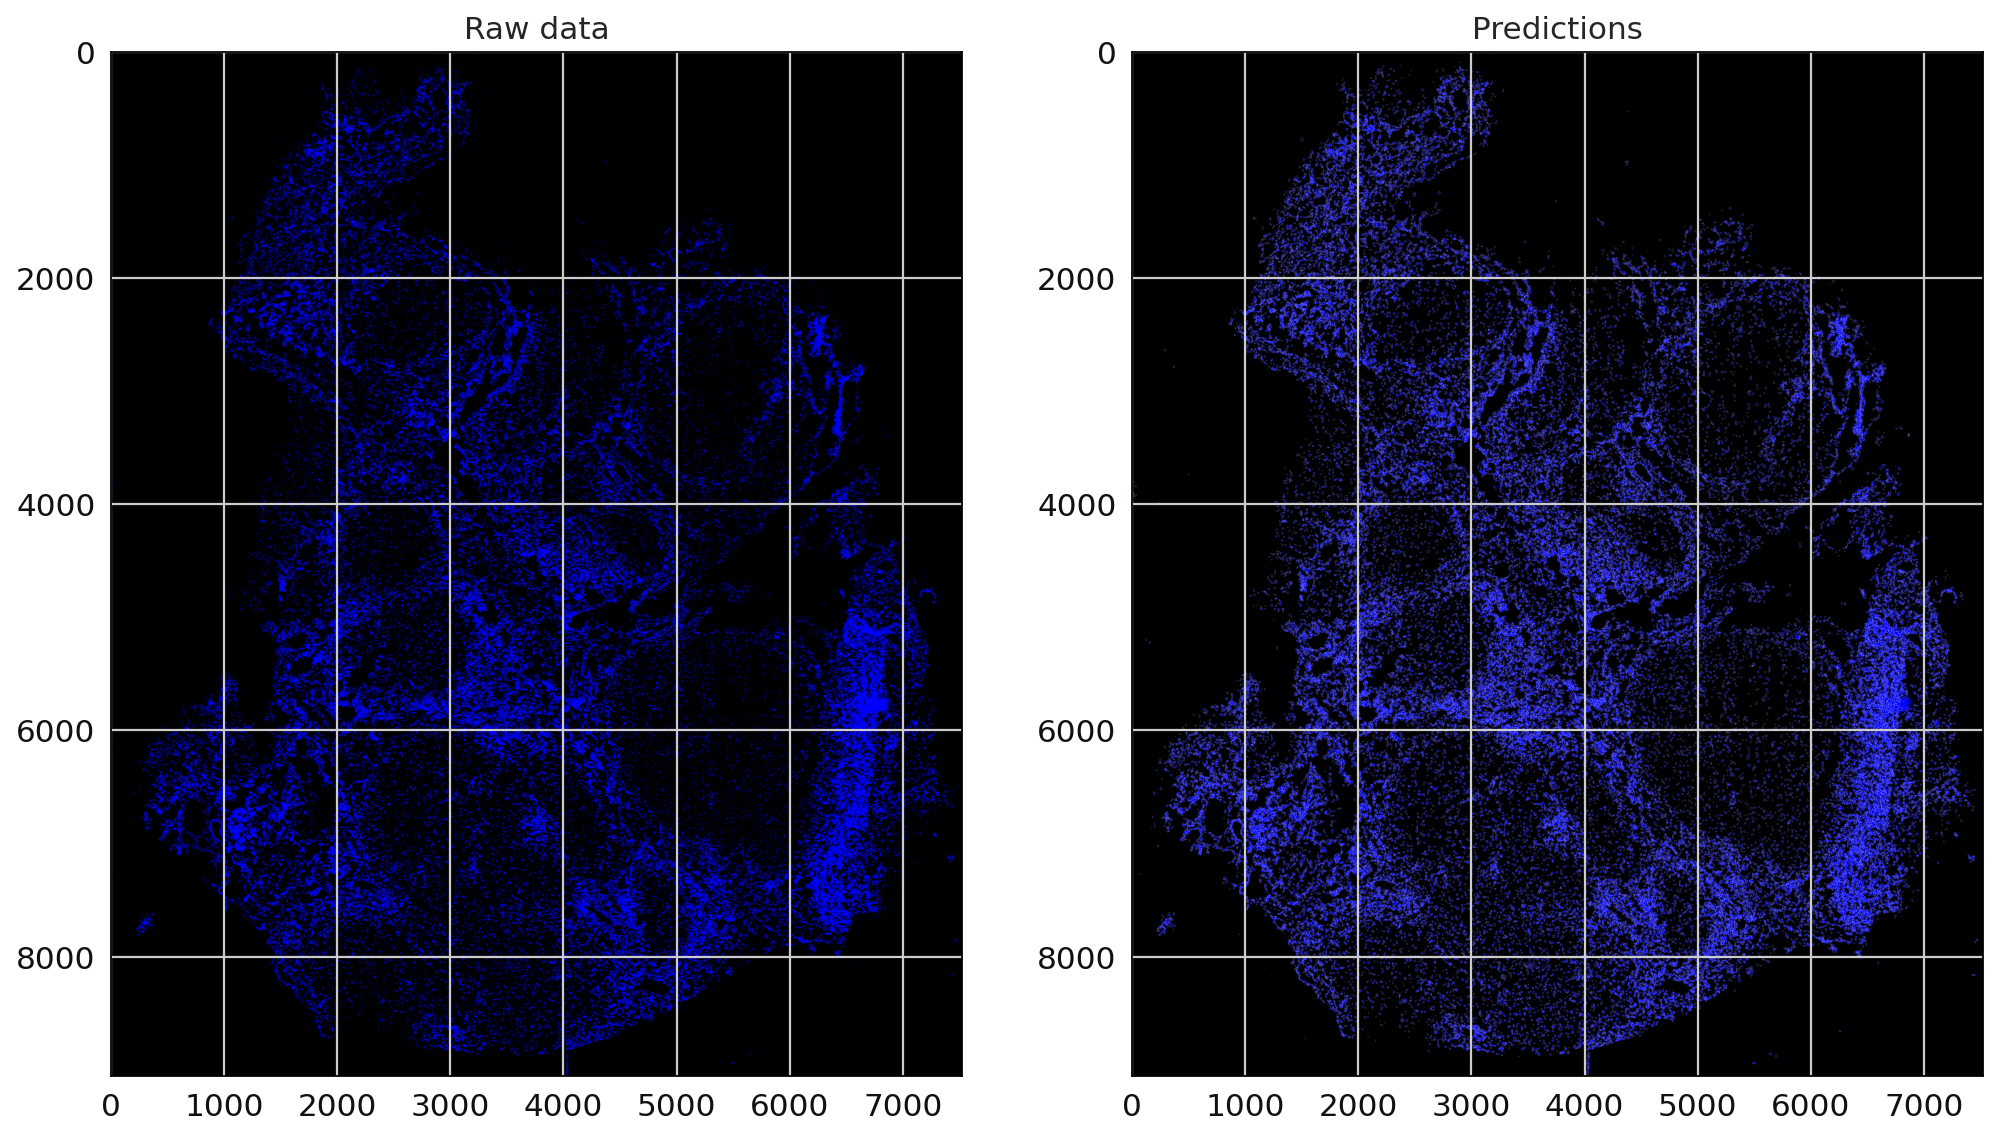

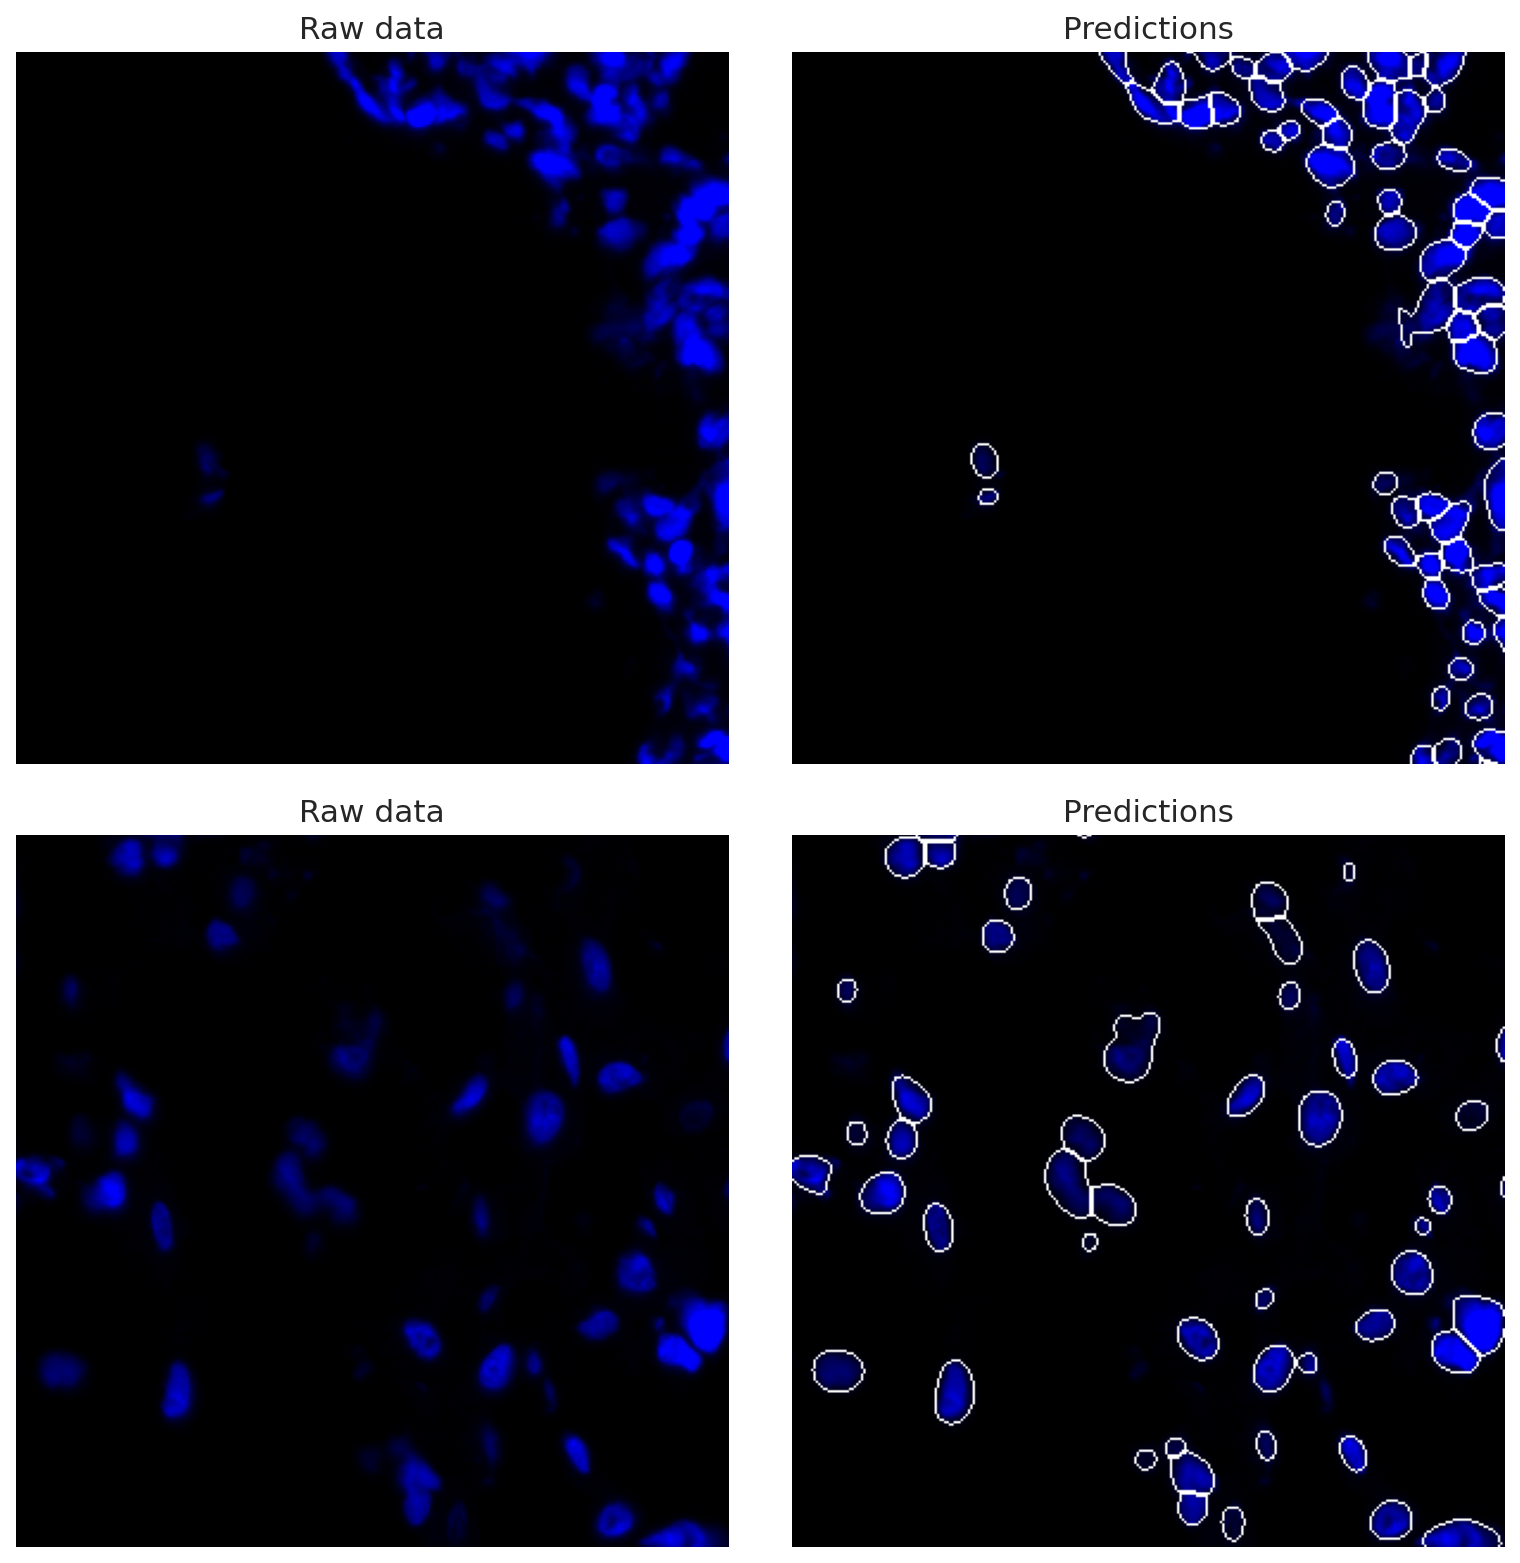

In [9]:
overlay_data2, rgb_images2 = sp.pl.show_masks(
    seg_output=seg_output2,
    nucleus_channel = 'DAPI', # channel used for nuclei segmentation, # additional channels to display (displayed in green - channels will be combined into one image)
    show_subsample = True, # show a random subsample of the image
    n=2, #need to be at least 2
    tilesize = 300,# number of subsamples and tilesize
    rand_seed = 1)